In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os


zip_path = '/content/drive/MyDrive/Colab Notebooks/TB_Chest_Radiography_Database'

if os.path.exists(zip_path):
    print("File found.")
else:
    print("File not found.")


File found.


In [3]:
from google.colab import drive
import os
import zipfile



zip_path = '/content/drive/MyDrive/Colab Notebooks/TB_Chest_Radiography_Database.zip'

if os.path.exists(zip_path):
    print("File found.")

    #  Unzip the file
    extract_path = '/content/TB_Chest_Radiography_Database'
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Extraction complete.")

    #  View the contents
    for root, dirs, files in os.walk(extract_path):
        for name in files:
            print(os.path.join(root, name))
        for name in dirs:
            print(os.path.join(root, name))
else:
    print("File not found.")


Streaming output truncated to the last 5000 lines.
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-2689.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-2743.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-1349.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-2294.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-629.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-3306.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-537.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-1572.png
/content/TB_Chest_Radiography_Database/__MACOSX/TB_Chest_Radiography_Database/Normal/._Normal-2643.png
/content/TB_Chest_Radiog

**Explore the Normal and Tuberculosis Folders**

In [4]:
import pandas as pd

def list_sample_files(folder_path, sample_size=5):
    print(f"\nListing sample files in {folder_path}:")
    files = os.listdir(folder_path)
    for file in files[:sample_size]:
        print(file)

normal_folder = os.path.join(extract_path, 'TB_Chest_Radiography_Database', 'Normal')
tuberculosis_folder = os.path.join(extract_path, 'TB_Chest_Radiography_Database', 'Tuberculosis')

list_sample_files(normal_folder)
list_sample_files(tuberculosis_folder)

# Read and display metadata files
normal_metadata = os.path.join(extract_path, 'TB_Chest_Radiography_Database', 'Normal.metadata.xlsx')
tuberculosis_metadata = os.path.join(extract_path, 'TB_Chest_Radiography_Database', 'Tuberculosis.metadata.xlsx')

if os.path.exists(normal_metadata):
    normal_df = pd.read_excel(normal_metadata)
    print("\nNormal Metadata:")
    print(normal_df.head())

if os.path.exists(tuberculosis_metadata):
    tb_df = pd.read_excel(tuberculosis_metadata)
    print("\nTuberculosis Metadata:")
    print(tb_df.head())
else:
    print("File not found.")



Listing sample files in /content/TB_Chest_Radiography_Database/TB_Chest_Radiography_Database/Normal:
Normal-2377.png
Normal-1407.png
Normal-3030.png
Normal-2413.png
Normal-1033.png

Listing sample files in /content/TB_Chest_Radiography_Database/TB_Chest_Radiography_Database/Tuberculosis:
Tuberculosis-658.png
Tuberculosis-603.png
Tuberculosis-170.png
Tuberculosis-540.png
Tuberculosis-398.png

Normal Metadata:
  FILE NAME FORMAT     SIZE                                                URL
0  Normal-1    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
1  Normal-2    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
2  Normal-3    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
3  Normal-4    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
4  Normal-5    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...

Tuberculosis Metadata:
        FILE NAME FORMAT     SIZE                      URL
0  Tuberculosis-1    PNG  512*

**Count Folder Files**

In [5]:
def count_files(folder_path):
    return len(os.listdir(folder_path))

normal_count = count_files(normal_folder)
tb_count = count_files(tuberculosis_folder)

print(f"Number of Normal images: {normal_count}")
print(f"Number of Tuberculosis images: {tb_count}")


Number of Normal images: 3500
Number of Tuberculosis images: 700


**Check for Missing Values in the MetaData Files**

In [6]:
print("\nChecking for missing values in metadata files:")

if os.path.exists(normal_metadata):
    normal_missing_values = normal_df.isnull().sum()
    print("\nNormal Metadata Missing Values:")
    print(normal_missing_values)

if os.path.exists(tuberculosis_metadata):
    tb_missing_values = tb_df.isnull().sum()
    print("\nTuberculosis Metadata Missing Values:")
    print(tb_missing_values)



Checking for missing values in metadata files:

Normal Metadata Missing Values:
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64

Tuberculosis Metadata Missing Values:
FILE NAME    0
FORMAT       0
SIZE         0
URL          0
dtype: int64


**Generate Statistics for Metadata Files**

In [7]:
print("\nGenerating basic statistics from metadata files:")

if os.path.exists(normal_metadata):
    print("\nNormal Metadata Statistics:")
    print(normal_df.describe())

if os.path.exists(tuberculosis_metadata):
    print("\nTuberculosis Metadata Statistics:")
    print(tb_df.describe())



Generating basic statistics from metadata files:

Normal Metadata Statistics:
          FILE NAME FORMAT     SIZE  \
count          3500   3500     3500   
unique         3500      1        1   
top     Normal-3500    PNG  512*512   
freq              1   3500     3500   

                                                      URL  
count                                                3500  
unique                                                  2  
top     https://www.kaggle.com/c/rsna-pneumonia-detect...  
freq                                                 3094  

Tuberculosis Metadata Statistics:
               FILE NAME FORMAT     SIZE  \
count                700    700      700   
unique               700      1        1   
top     Tuberculosis-700    PNG  512*512   
freq                   1    700      700   

                                                      URL  
count                                                 700  
unique                                           

**Plot Sample Images from the Normal and Tuberculosis Folder**


Plotting sample images from Normal folder:


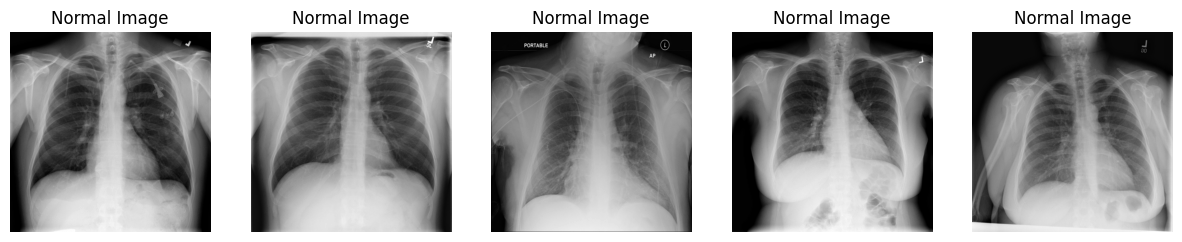


Plotting sample images from Tuberculosis folder:


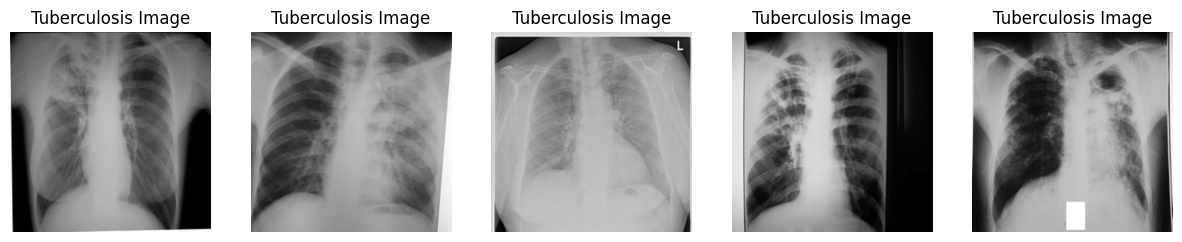

In [8]:
import matplotlib.pyplot as plt
import cv2

def plot_sample_images(folder_path, label, sample_size=5):
    files = os.listdir(folder_path)[:sample_size]
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(files):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, sample_size, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{label} Image")
        plt.axis('off')
    plt.show()

print("\nPlotting sample images from Normal folder:")
plot_sample_images(normal_folder, "Normal")

print("\nPlotting sample images from Tuberculosis folder:")
plot_sample_images(tuberculosis_folder, "Tuberculosis")


**Visualize image size Distribution in the Dataset**


Visualizing image size distribution in Normal dataset:


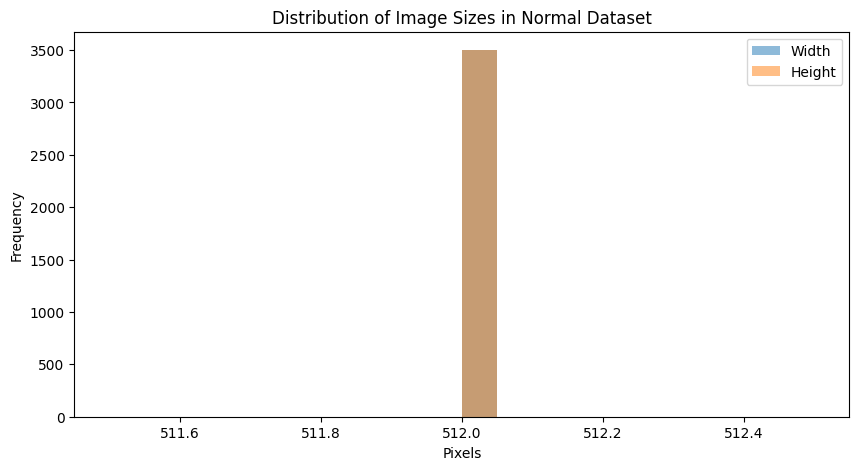


Visualizing image size distribution in Tuberculosis dataset:


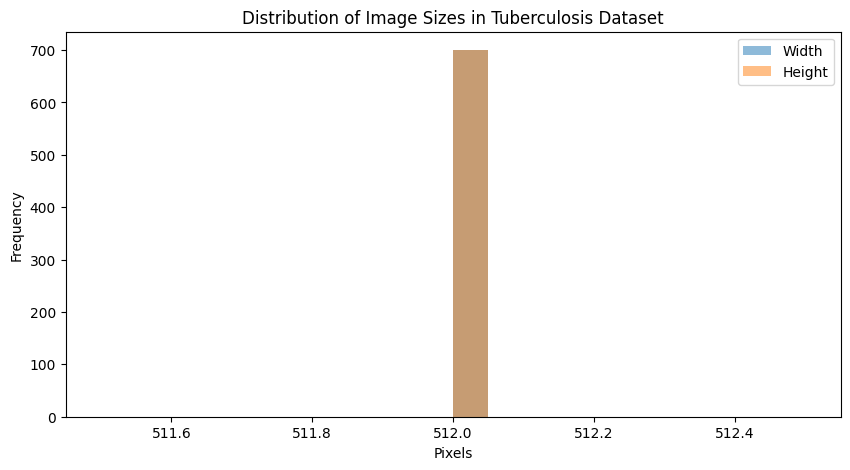

In [9]:
def visualize_image_sizes(metadata_df, label):
    metadata_df[['Width', 'Height']] = metadata_df['SIZE'].str.split('*', expand=True)
    metadata_df['Width'] = pd.to_numeric(metadata_df['Width'])
    metadata_df['Height'] = pd.to_numeric(metadata_df['Height'])

    plt.figure(figsize=(10, 5))
    plt.hist(metadata_df['Width'], bins=20, alpha=0.5, label='Width')
    plt.hist(metadata_df['Height'], bins=20, alpha=0.5, label='Height')
    plt.xlabel('Pixels')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Image Sizes in {label} Dataset')
    plt.legend(loc='upper right')
    plt.show()

if os.path.exists(normal_metadata):
    print("\nVisualizing image size distribution in Normal dataset:")
    visualize_image_sizes(normal_df, "Normal")

if os.path.exists(tuberculosis_metadata):
    print("\nVisualizing image size distribution in Tuberculosis dataset:")
    visualize_image_sizes(tb_df, "Tuberculosis")


**Preprocessing for the Models Training**

In [23]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Target image size
TARGET_SIZE = (224, 224)

# Preprocess images
def preprocess_images(folder_path, label, target_size):
    images = []
    labels = []
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img_resized = cv2.resize(img, target_size)
            # Convert grayscale to RGB by repeating the single channel
            img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2RGB)
            img_normalized = img_rgb / 255.0
            images.append(img_normalized)
            labels.append(label)
    return np.array(images), np.array(labels)

# Preprocess Normal images
normal_images, normal_labels = preprocess_images(normal_folder, 0, TARGET_SIZE)
print(f"Processed {normal_images.shape[0]} Normal images.")

# Preprocess Tuberculosis images
tb_images, tb_labels = preprocess_images(tuberculosis_folder, 1, TARGET_SIZE)
print(f"Processed {tb_images.shape[0]} Tuberculosis images.")

# Combine the datasets
X = np.concatenate((normal_images, tb_images), axis=0)
y = np.concatenate((normal_labels, tb_labels), axis=0)

# Initialize StratifiedShuffleSplit for training and test split
sss_test = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(sss_test.split(X, y))
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

# Initialize StratifiedShuffleSplit for training and validation split
sss_val = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2 of original dataset
train_idx, val_idx = next(sss_val.split(X_train, y_train))
X_train, X_val = X_train[train_idx], X_train[val_idx]
y_train, y_val = y_train[train_idx], y_train[val_idx]

print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Processed 3500 Normal images.
Processed 700 Tuberculosis images.
Training set: 2520 samples
Validation set: 840 samples
Test set: 840 samples


**Importing Necessary Libraries for Building and Training of the Models and to Ensure GPU usage from colab**

In [11]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Ensure GPU usage
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


**Build the Model**

In [35]:
import json
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dropout, Dense
from keras.optimizers import Adam
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

def train_model(base_model, X_train, y_train, X_val, y_val, model_name, epochs=30, batch_size=32):
    # Freeze the base model
    base_model.trainable = False

    # Add custom layers on top of the base model
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Calculate class weights
    class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = dict(enumerate(class_weights))

    # Create a checkpoint to save the best model
    checkpoint = ModelCheckpoint(f'{model_name}_best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

    # Train the model
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        class_weight=class_weights,
        callbacks=[checkpoint]
    )

    # Save training history to a JSON file
    with open(f'{model_name}_history.json', 'w') as f:
        json.dump(history.history, f)

    # Load the best saved model
    model.load_weights(f'{model_name}_best_model.keras')

    # Evaluate the best model on the validation set
    score = model.evaluate(X_val, y_val, verbose=0)
    print(f"{model_name} Best Model Validation loss:", score[0])
    print(f"{model_name} Best Model Validation accuracy:", score[1])

    # Generate classification report on the validation set
    y_pred = (model.predict(X_val) > 0.5).astype("int32")
    print(f"{model_name} Classification Report on Validation Set:")
    print(classification_report(y_val, y_pred))

    # Plot training history
    plot_history(model_name)

    # Generate the confusion matrix on the validation set
    cm = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix on Validation Set:")
    print(cm)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def plot_history(model_name):
    # Load training history from JSON file
    history_file = f'{model_name}_history.json'
    if os.path.exists(history_file):
        with open(history_file, 'r') as f:
            history = json.load(f)

        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history['accuracy'], label='train accuracy')
        plt.plot(history['val_accuracy'], label='val accuracy')
        plt.title(f'{model_name} Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history['loss'], label='train loss')
        plt.plot(history['val_loss'], label='val loss')
        plt.title(f'{model_name} Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.show()
    else:
        print(f"No history file found for {model_name}.")


**Training of VGG16**

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.6821 - accuracy: 0.5591
Epoch 1: val_accuracy improved from -inf to 0.53929, saving model to VGG16_best_model.keras
79/79 [==============================] - 16s 189ms/step - loss: 0.6821 - accuracy: 0.5591 - val_loss: 0.6901 - val_accuracy: 0.5393
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.7004
Epoch 2: val_accuracy improved from 0.53929 to 0.77976, saving model to VGG16_best_model.keras
79/79 [==============================] - 13s 168ms/step - loss: 0.6141 - accuracy: 0.7004 - val_loss: 0.6110 - val_accuracy: 0.7798
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.5574 - accuracy: 0.7659
Epoch 3: val_accuracy improved from 0.77976 to 0.89643, saving model to VGG16_best_model.keras
79/79 [==============================] - 13s 167ms/step - loss: 0.5574 - accuracy: 0.7659 - val_loss: 0.4712 - val_accuracy: 0.8964
Epoch 4/30
79/79 [======================

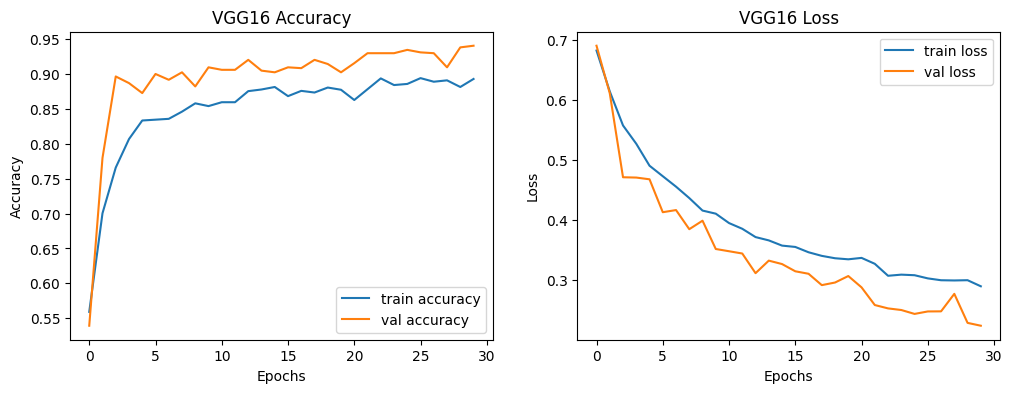

Confusion Matrix on Validation Set:
[[656  44]
 [  6 134]]


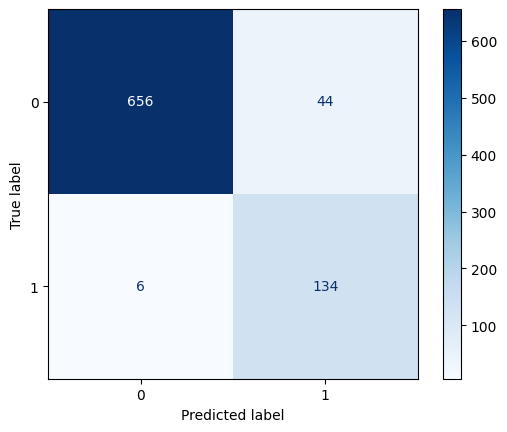

In [37]:
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
train_model(base_model_vgg16, X_train, y_train, X_val, y_val, "VGG16")

**Training of ResNet50**

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.7291 - accuracy: 0.5067
Epoch 1: val_accuracy improved from -inf to 0.33690, saving model to ResNet50_best_model.keras
79/79 [==============================] - 16s 163ms/step - loss: 0.7291 - accuracy: 0.5067 - val_loss: 0.6961 - val_accuracy: 0.3369
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.7189 - accuracy: 0.4913
Epoch 2: val_accuracy did not improve from 0.33690
79/79 [==============================] - 10s 124ms/step - loss: 0.7189 - accuracy: 0.4913 - val_loss: 0.7394 - val_accuracy: 0.1679
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.7074 - accuracy: 0.5369
Epoch 3: val_accuracy did not improve from 0.33690
79/79 [==============================] - 10s 125ms/step - loss: 0.7074 - accuracy: 0.5369 - val_loss: 0.7581 - val_accuracy: 0.1667
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 0.7007 - accuracy: 0.5087
Epoch 4: val_accuracy improved 

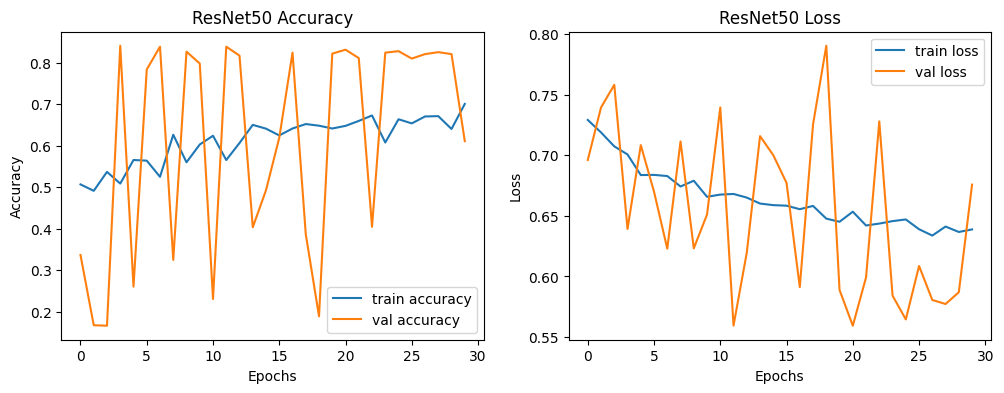

Confusion Matrix on Validation Set:
[[686  14]
 [120  20]]


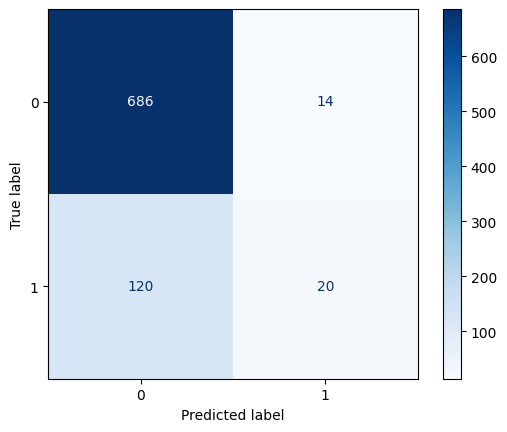

In [40]:
# Load the ResNet50 base model with pre-trained ImageNet weights
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

train_model(base_model_resnet50, X_train, y_train, X_val, y_val, "ResNet50")


**Training of Inceptionv3**

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.5412 - accuracy: 0.7480
Epoch 1: val_accuracy improved from -inf to 0.92381, saving model to InceptionV3_best_model.keras
79/79 [==============================] - 15s 137ms/step - loss: 0.5412 - accuracy: 0.7480 - val_loss: 0.2579 - val_accuracy: 0.9238
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8591
Epoch 2: val_accuracy did not improve from 0.92381
79/79 [==============================] - 7s 90ms/step - loss: 0.3561 - accuracy: 0.8591 - val_loss: 0.2185 - val_accuracy: 0.9238
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.2754 - accuracy: 0.8901
Epoch 3: val_accuracy improved from 0.92381 to 0.93929, saving model to InceptionV3_best_model.keras
79/79 [==============================] - 8s 104ms/step - loss: 0.2754 - accuracy: 0.8901 - val_loss: 0.1959 - val_accuracy: 0.9393
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 0.2545 

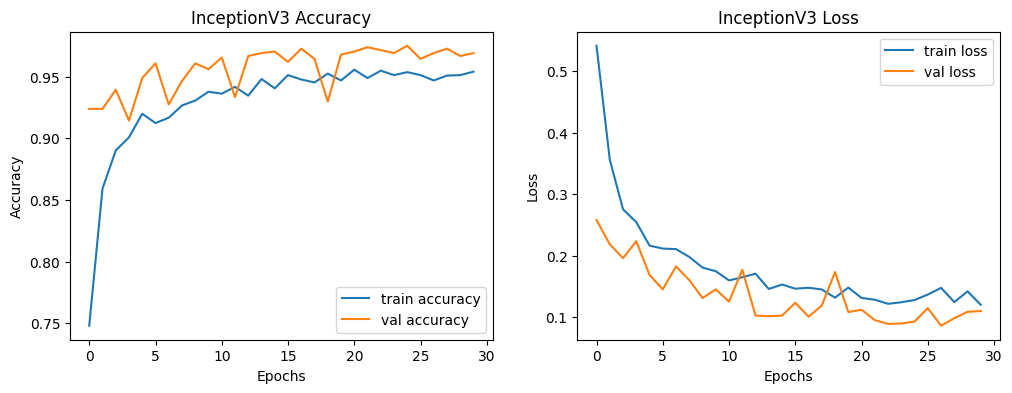

Confusion Matrix on Validation Set:
[[689  11]
 [ 10 130]]


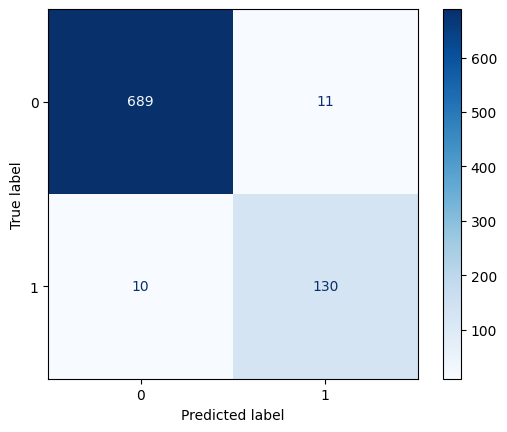

In [39]:
# Load the InceptionV3 base model with pre-trained ImageNet weights
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


train_model(base_model_inceptionv3, X_train, y_train, X_val, y_val, "InceptionV3")


**Training of Densenet121**

Epoch 1/30
79/79 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7206
Epoch 1: val_accuracy improved from -inf to 0.93095, saving model to DenseNet121_best_model.keras
79/79 [==============================] - 20s 175ms/step - loss: 0.5729 - accuracy: 0.7206 - val_loss: 0.3509 - val_accuracy: 0.9310
Epoch 2/30
79/79 [==============================] - ETA: 0s - loss: 0.3828 - accuracy: 0.8421
Epoch 2: val_accuracy improved from 0.93095 to 0.96071, saving model to DenseNet121_best_model.keras
79/79 [==============================] - 11s 134ms/step - loss: 0.3828 - accuracy: 0.8421 - val_loss: 0.2277 - val_accuracy: 0.9607
Epoch 3/30
79/79 [==============================] - ETA: 0s - loss: 0.2867 - accuracy: 0.9012
Epoch 3: val_accuracy did not improve from 0.96071
79/79 [==============================] - 10s 121ms/step - loss: 0.2867 - accuracy: 0.9012 - val_loss: 0.2148 - val_accuracy: 0.9595
Epoch 4/30
79/79 [==============================] - ETA: 0s - loss: 0.25

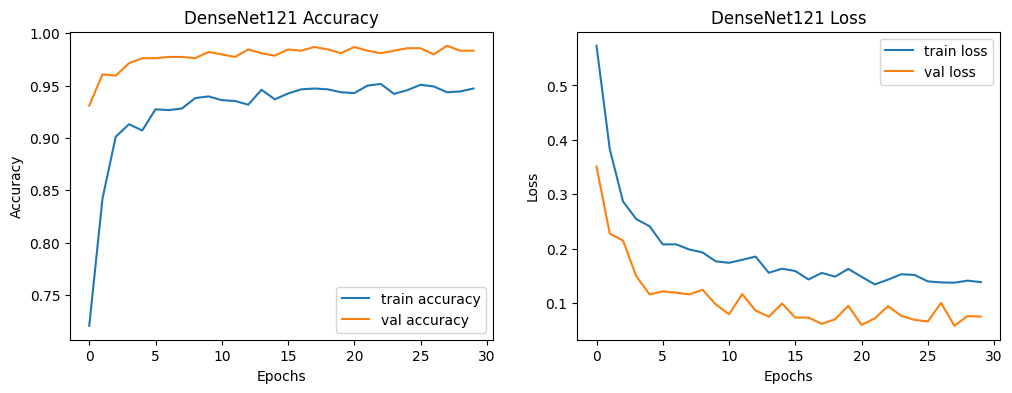

Confusion Matrix on Validation Set:
[[692   8]
 [  2 138]]


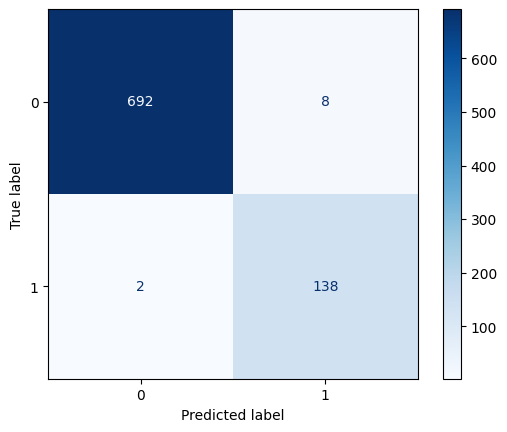

In [38]:
# Load the DenseNet121 base model with pre-trained ImageNet weights
base_model_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


train_model(base_model_densenet121, X_train, y_train, X_val, y_val, "DenseNet121")

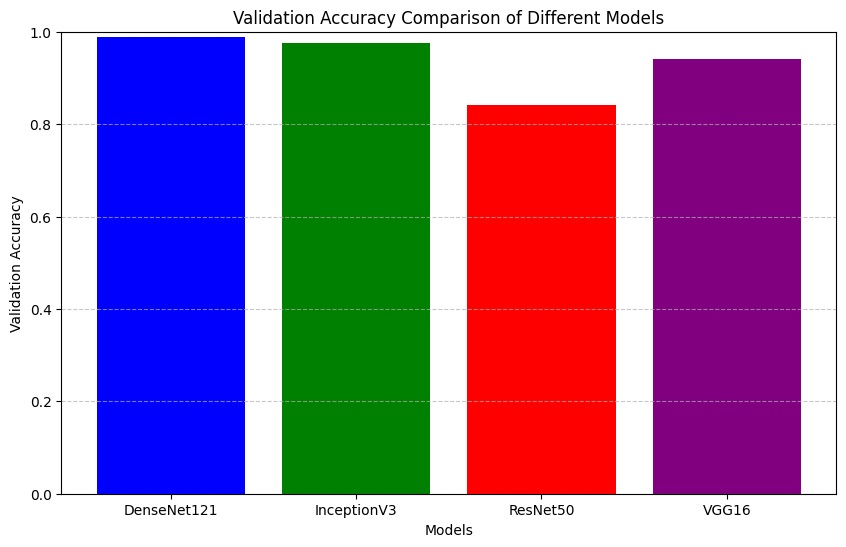

In [46]:
import matplotlib.pyplot as plt

# Define the model names and their validation accuracies
models = ['DenseNet121', 'InceptionV3', 'ResNet50', 'VGG16']
accuracies = [0.988095223903656, 0.9750000238418579, 0.8404762148857117, 0.9404761791229248]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison of Different Models')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Evaluate Test set on Saved VGG16 Model

Test accuracy: 0.938095211982727
27/27 [==============================] - 3s 122ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       700
           1       0.74      0.96      0.84       140

    accuracy                           0.94       840
   macro avg       0.87      0.95      0.90       840
weighted avg       0.95      0.94      0.94       840

Confusion Matrix:
[[653  47]
 [  5 135]]


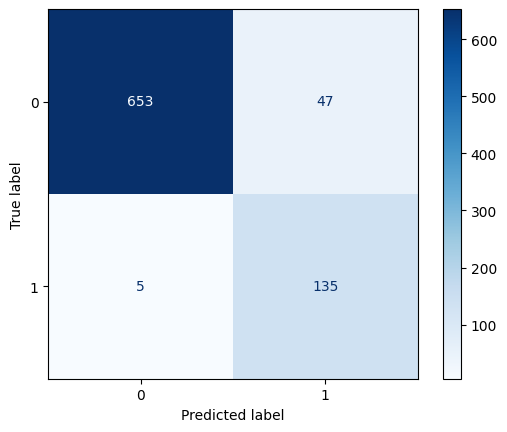

In [42]:
import json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = '/content/VGG16_best_model.keras'
model = load_model(model_path)

# Load the test data (X_test, y_test)
# Assuming you have the X_test and y_test in your environment

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {score[1]}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Evaluate Test Set on Saved ResNet50 Model

Test accuracy: 0.8440476059913635
27/27 [==============================] - 3s 92ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       700
           1       0.68      0.12      0.21       140

    accuracy                           0.84       840
   macro avg       0.76      0.55      0.56       840
weighted avg       0.82      0.84      0.80       840

Confusion Matrix:
[[692   8]
 [123  17]]


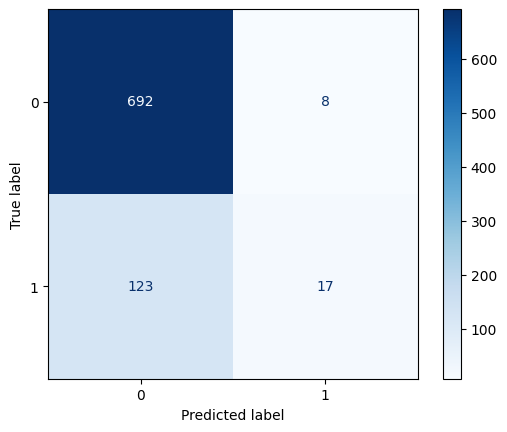

In [43]:
import json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = '/content/ResNet50_best_model.keras'
model = load_model(model_path)

# Load the test data (X_test, y_test)


# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {score[1]}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Evaluate saved DenseNet121 Model on Test Set

Test accuracy: 0.9809523820877075
27/27 [==============================] - 4s 88ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       700
           1       0.92      0.97      0.94       140

    accuracy                           0.98       840
   macro avg       0.96      0.98      0.97       840
weighted avg       0.98      0.98      0.98       840

Confusion Matrix:
[[688  12]
 [  4 136]]


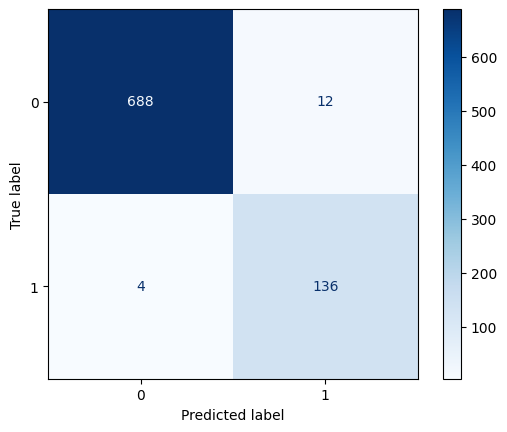

In [44]:
import json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = '/content/DenseNet121_best_model.keras'
model = load_model(model_path)

# Load the test data (X_test, y_test)


# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy: {score[1]}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


Evaluate Saved trained InceptionV3 Model on Test Set



Test accuracy: 0.9726190567016602
27/27 [==============================] - 4s 67ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       700
           1       0.90      0.94      0.92       140

    accuracy                           0.97       840
   macro avg       0.95      0.96      0.95       840
weighted avg       0.97      0.97      0.97       840

Confusion Matrix:
[[686  14]
 [  9 131]]


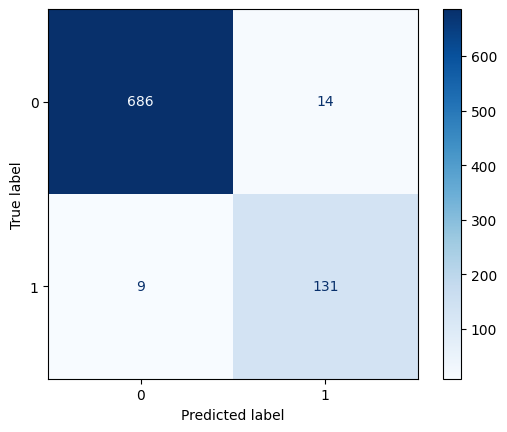

In [45]:
import json
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model
model_path = '/content/InceptionV3_best_model.keras'
model = load_model(model_path)

# Load the test data (X_test, y_test)


# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {score[1]}")

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


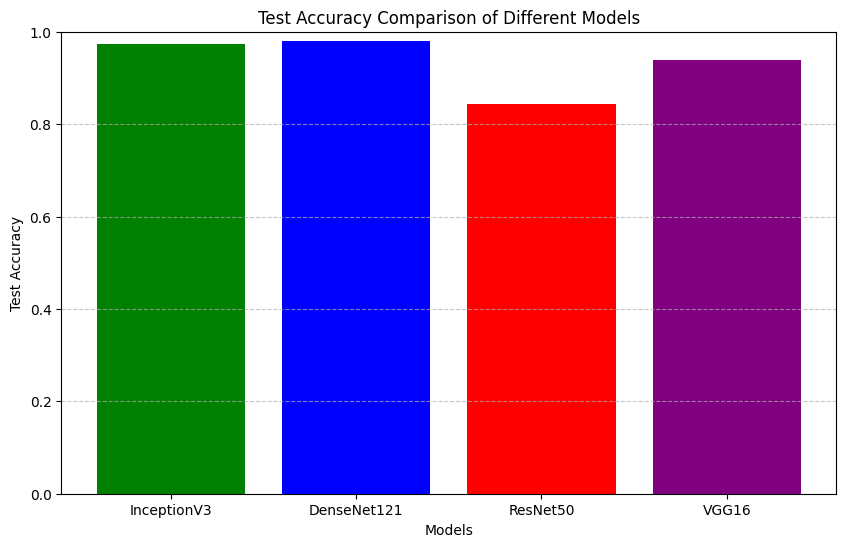

In [47]:
import matplotlib.pyplot as plt

# Define the model names and their test accuracies
models = ['InceptionV3', 'DenseNet121', 'ResNet50', 'VGG16']
test_accuracies = [0.9726190567016602, 0.9809523820877075, 0.8440476059913635, 0.938095211982727]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color=['green', 'blue', 'red', 'purple'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to 0-1 for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()
